In [1]:
# import different libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
new_df = pd.read_csv('final_dataset3.csv')
new_df = new_df.drop(['Unnamed: 0', 'Organization Name URL', ], axis=1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66721 entries, 0 to 66720
Data columns (total 17 columns):
Organization Name                         66720 non-null object
CB Rank (Company)                         66721 non-null object
Headquarters Regions                      66721 non-null object
Category Groups                           66721 non-null object
Number of Founders                        66721 non-null object
Founders                                  66721 non-null object
Number of Employees                       58894 non-null object
Number of Funding Rounds                  66721 non-null object
Last Funding Type                         66721 non-null object
Total Funding Amount                      66719 non-null object
Total Funding Amount Currency             66721 non-null object
Total Funding Amount Currency (in USD)    66717 non-null object
Organization                              30003 non-null object
Names                                     30003 non-null ob

/home/bossou/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (6,9,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
new_df = new_df.drop_duplicates(subset=['Organization Name'])
new_df.shape

(66152, 17)

In [4]:
new_df = new_df[new_df['Group Gender'].notnull()]
new_df.shape

(29501, 17)

In [5]:
new_df.head()

,Organization Name,CB Rank (Company),Headquarters Regions,Category Groups,Number of Founders,Founders,Number of Employees,Number of Funding Rounds,Last Funding Type,Total Funding Amount,Total Funding Amount Currency,Total Funding Amount Currency (in USD),Organization,Names,Group Gender,Genders,Job Titles
1,Baetes,"80,003","European Union (EU), Nordic Countries, Scandin...","Clothing and Apparel, Commerce and Shopping, D...",3,"Erik Sjoberg, Filip Waak, Fredrik Heiding",NaN,1,Convertible Note,32000,EUR,39572,Baetes,"['Erik Sjoberg', 'Erik Sjoberg']",Male only,"['Male', 'Male']","['Founder & CEO', 'Founder & CEO']"
3,Rendy.io,"80,009",Latin America,"Commerce and Shopping, Hardware, Sales and Mar...",2,"Gerardo Mora, Israel Medina",1-10,2,Seed,100000,USD,100000,Rendy.io,"['Israel Medina', 'Israel Medina']",Male only,"['Male', 'Male']","['Founder & CEO', 'Founder & CEO']"
9,Leap,"80,020",European Union (EU),"Internet Services, Sports",5,"Christo Peev, Felix Quinton, Georgi Karadzhov,...",11-50,3,Seed,60000,EUR,79761,Leap,"['Amish Tolia', 'Remco van den Elzen', 'Christ...",Male only,"['Male', 'Male', 'Male', 'Male', 'Male', 'Male']","['Founder & CEO', 'Founder & COO', 'Other Foun..."
13,Wekho,"80,035","Greater Miami Area, East Coast, Southern US","Apps, Internet Services, Media and Entertainme...",1,Fedor Saldivia,1-10,3,Seed,350000,USD,350000,Wekho,"['Fedor Saldivia', 'Fedor Saldivia']",Male only,"['Male', 'Male']","['Founder & CEO', 'Founder & CEO']"
16,Intelline,"80,038",Great Lakes,"Energy, Manufacturing, Science and Engineering...",2,"Chris Mathew, Kyle Faller",1-10,2,Grant,15000,CAD,11391,Intelline,Kyle Faller,Male only,Male,Founder & CEO


In [6]:
new_df['Number of Funding Rounds'] = new_df['Number of Funding Rounds'].astype(float)
new_df['Number of Founders'] = new_df['Number of Founders'].astype(float)
new_df['Total Funding Amount Currency (in USD)'] = new_df['Total Funding Amount Currency (in USD)'].astype(float)
new_df['Total Funding Amount'] = new_df['Total Funding Amount'].astype(float)

In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29501 entries, 1 to 66720
Data columns (total 17 columns):
Organization Name                         29501 non-null object
CB Rank (Company)                         29501 non-null object
Headquarters Regions                      29501 non-null object
Category Groups                           29501 non-null object
Number of Founders                        29501 non-null float64
Founders                                  29501 non-null object
Number of Employees                       27145 non-null object
Number of Funding Rounds                  29501 non-null float64
Last Funding Type                         29501 non-null object
Total Funding Amount                      29501 non-null float64
Total Funding Amount Currency             29501 non-null object
Total Funding Amount Currency (in USD)    29501 non-null float64
Organization                              29501 non-null object
Names                                     29501 non-nul

In [8]:
null = new_df['Category Groups'].notnull()
new_df = new_df[null]
new_df.shape

(29501, 17)

In [9]:
null = new_df['Headquarters Regions'].notnull()
new_df = new_df[null]
new_df.shape

(29501, 17)

Female only     2350
Male only      25100
Mixed           2051
Name: Group Gender, dtype: int64


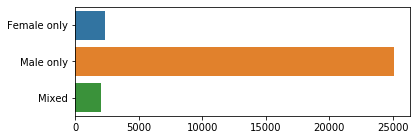

In [10]:
categories_counts= new_df['Group Gender'].value_counts().sort_index()
plt.figure(figsize=(6,2))
sns.barplot(y=categories_counts.index, x=categories_counts.values)
print(categories_counts)

In [11]:
#simplifying categories
new_df.loc[new_df['Category Groups'].str.contains('Finance|FinTech|Financial|Banking', case=False), 'Categories'] = 'Finance'
new_df.loc[new_df['Category Groups'].str.contains('Biotechnology', case=False), 'Categories'] = 'Biotechnology'
new_df.loc[new_df['Category Groups'].str.contains('Health Care', case=False), 'Categories'] = 'Health Care'
new_df.loc[new_df['Category Groups'].str.contains('E-Commerce', case=False), 'Categories'] = 'E-Commerce'
new_df.loc[new_df['Category Groups'].str.contains('Software', case=False), 'Categories'] = 'Software'
new_df.loc[new_df['Category Groups'].str.contains('Internet', case=False), 'Categories'] = 'Internet'
new_df.loc[new_df['Category Groups'].str.contains('Information Technology', case=False), 'Categories'] = 'Information Technology'
new_df.loc[new_df['Category Groups'].str.contains('Education', case=False), 'Categories'] = 'Education'
new_df.loc[new_df['Category Groups'].str.contains('Network Security|Cyber Security', case=False), 'Categories'] = 'Security'
new_df.loc[new_df['Category Groups'].str.contains('Real Estate', case=False), 'Categories'] = 'Real Estate'
new_df.loc[new_df['Category Groups'].str.contains('Tourism', case=False), 'Categories'] = 'Tourism'
new_df.loc[new_df['Category Groups'].str.contains('Artificial Intelligence', case=False), 'Categories'] = 'Artificial Intelligence'
new_df.loc[new_df['Category Groups'].str.contains('Food', case=False), 'Categories'] = 'Food'
new_df.loc[new_df['Category Groups'].str.contains('Advertising', case=False), 'Categories'] = 'Advertising'
new_df.loc[new_df['Category Groups'].str.contains('Fashion', case=False), 'Categories'] = 'Fashion'
new_df.loc[new_df['Category Groups'].str.contains('Data', case=False), 'Categories'] = 'Data'
new_df.loc[new_df['Category Groups'].str.contains('Robotics', case=False), 'Categories'] = 'Robotics'
new_df.loc[new_df['Category Groups'].str.contains('Gaming', case=False), 'Categories'] = 'Gaming'
new_df.loc[new_df['Category Groups'].str.contains('Sports', case=False), 'Categories'] = 'Sports'
new_df.loc[new_df['Category Groups'].str.contains('Entertainment', case=False), 'Categories'] = 'Entertainment'
new_df.loc[new_df['Category Groups'].str.contains('Insurance', case=False), 'Categories'] = 'Insurance'

In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29501 entries, 1 to 66720
Data columns (total 18 columns):
Organization Name                         29501 non-null object
CB Rank (Company)                         29501 non-null object
Headquarters Regions                      29501 non-null object
Category Groups                           29501 non-null object
Number of Founders                        29501 non-null float64
Founders                                  29501 non-null object
Number of Employees                       27145 non-null object
Number of Funding Rounds                  29501 non-null float64
Last Funding Type                         29501 non-null object
Total Funding Amount                      29501 non-null float64
Total Funding Amount Currency             29501 non-null object
Total Funding Amount Currency (in USD)    29501 non-null float64
Organization                              29501 non-null object
Names                                     29501 non-nul

In [13]:
categories_counts= new_df['Categories'].value_counts().nlargest(30)
categories_counts

Data                      4300
Entertainment             4210
Information Technology    3402
Software                  3317
Health Care               2676
Internet                  2006
Food                      1154
Real Estate               1112
Finance                   1063
Education                 1016
Sports                     872
Tourism                    737
Advertising                529
Gaming                     424
Biotechnology              139
Name: Categories, dtype: int64

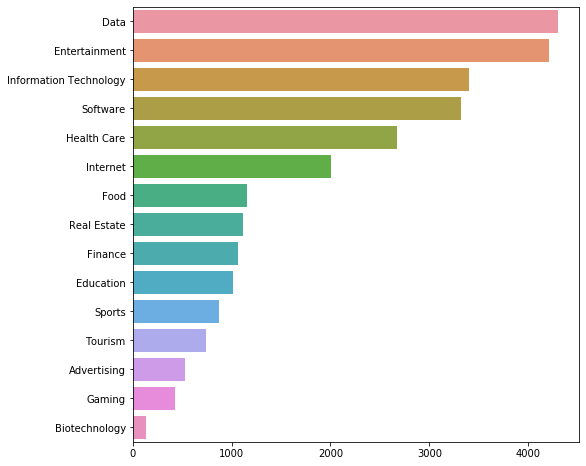

In [14]:
plt.figure(figsize=(8,8))
sns.barplot(y=categories_counts.index, x=categories_counts.values)

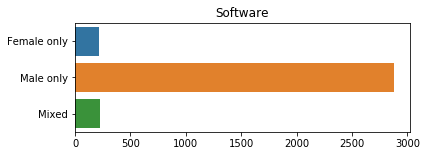

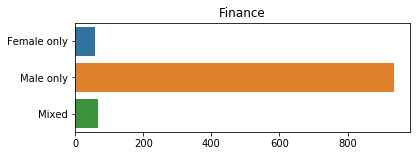

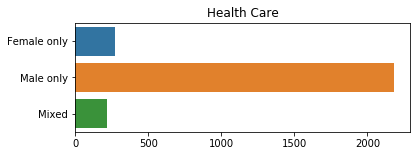

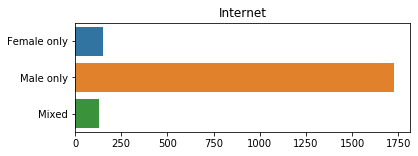

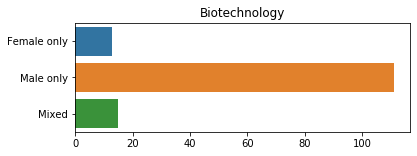

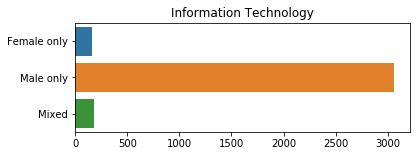

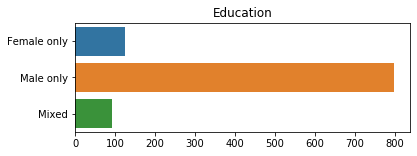

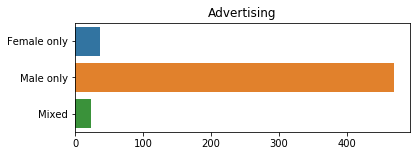

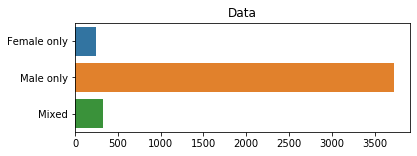

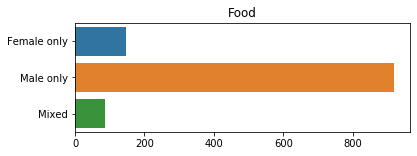

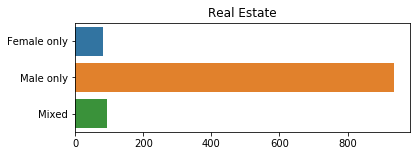

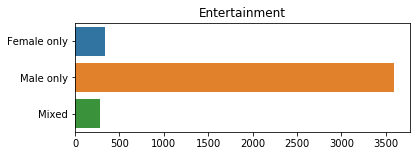

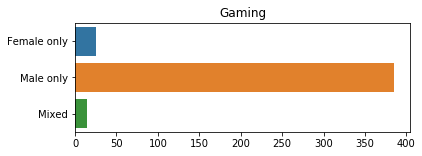

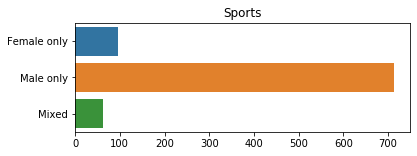

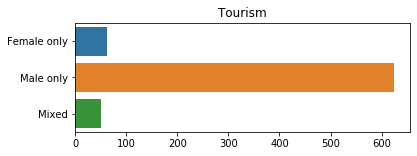

In [15]:
# categories = ['Software','Finance','E-Commerce','Health Care','Internet','Biotechnology','Artificial Intelligence'
#               ,'Information Technology','Education','Advertising','Data','Food','Real Estate','Security',
#               'Entertainment','Gaming','Robotics','Fashion','Sports','Tourism','Insurance']

categories = ['Software','Finance', 'Health Care','Internet','Biotechnology'
              ,'Information Technology','Education','Advertising','Data','Food','Real Estate',
              'Entertainment','Gaming','Sports','Tourism']

for i in categories:
    gender_Categories = new_df[new_df['Categories'] == i]
    categories_counts= gender_Categories['Group Gender'].value_counts().sort_index()
    plt.figure(figsize=(6,2))
    plt.title(i)
    sns.barplot(y=categories_counts.index, x=categories_counts.values)

In [16]:
#simplifying regions
new_df.loc[new_df['Headquarters Regions'].str.contains('Asia-Pacific', case=False), 'Headquarters Regions'] = 'Asia-Pacific (APAC)'
new_df.loc[new_df['Headquarters Regions'].str.contains('European Union', case=False), 'Headquarters Regions'] = 'European Union (EU)'
new_df.loc[new_df['Headquarters Regions'].str.contains('San Francisco Bay Area', case=False), 'Headquarters Regions'] = 'San Francisco Bay Area, West Coast, Western US'

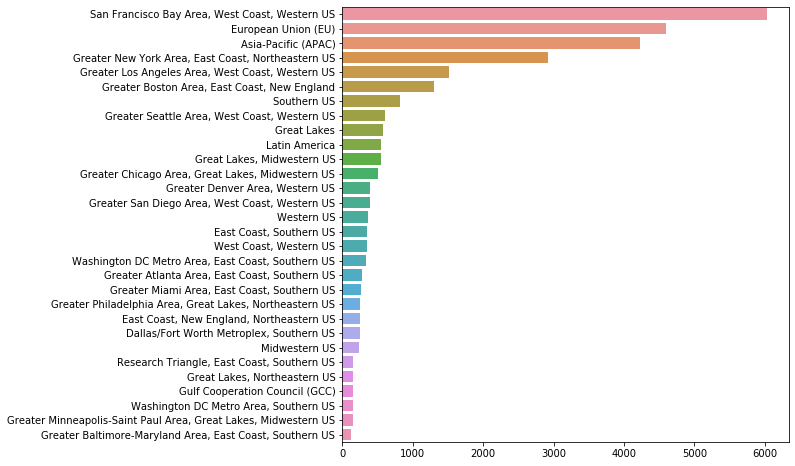

In [17]:
categories_counts= new_df['Headquarters Regions'].value_counts().nlargest(30)
plt.figure(figsize=(8,8))
sns.barplot(y=categories_counts.index, x=categories_counts.values)

In [18]:
#creating subdatasets for the top 6 regions
data_EU = new_df[new_df['Headquarters Regions'] == 'European Union (EU)']
data_Bay = new_df[new_df['Headquarters Regions'] == 'San Francisco Bay Area, West Coast, Western US']
data_APAC = new_df[new_df['Headquarters Regions'] == 'Asia-Pacific (APAC)']
data_NY = new_df[new_df['Headquarters Regions'] == 'Greater New York Area, East Coast, Northeastern US']
data_LA = new_df[new_df['Headquarters Regions'] == 'Greater Los Angeles Area, West Coast, Western US']
data_BO = new_df[new_df['Headquarters Regions'] == 'Greater Boston Area, East Coast, New England']

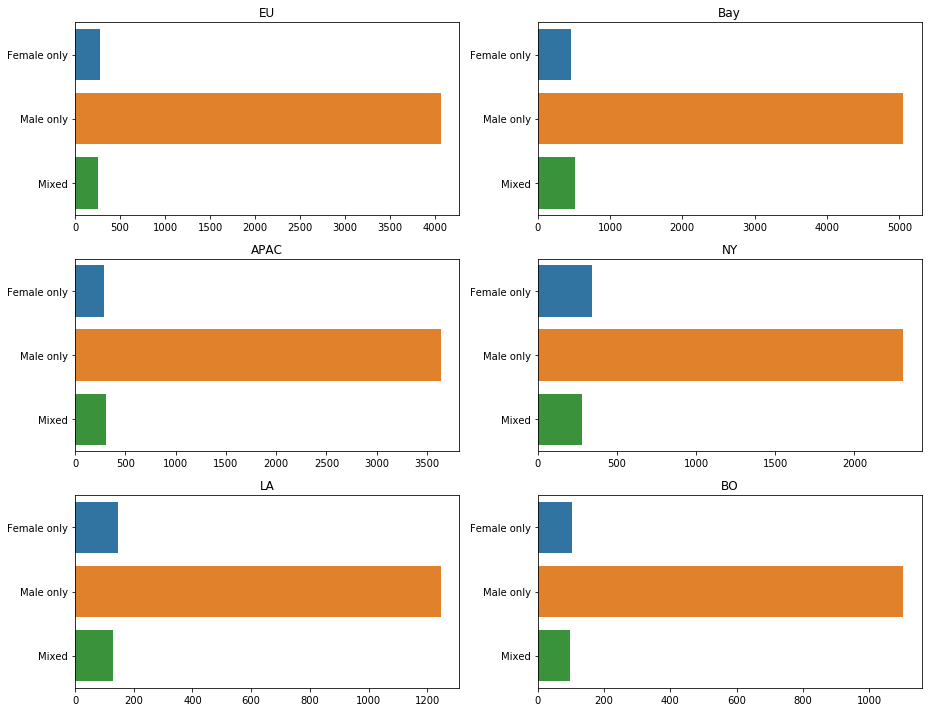

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(13,10))

categories_counts= data_EU['Group Gender'].value_counts().sort_index()
sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[0,0])
axes[0,0].set_title('EU')

categories_counts= data_Bay['Group Gender'].value_counts().sort_index()
sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[0,1])
axes[0,1].set_title('Bay')

categories_counts= data_APAC['Group Gender'].value_counts().sort_index()
sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[1,0])
axes[1,0].set_title('APAC')

categories_counts= data_NY['Group Gender'].value_counts().sort_index()
sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[1,1])
axes[1,1].set_title('NY')

categories_counts= data_LA['Group Gender'].value_counts().sort_index()
sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[2,0])
axes[2,0].set_title('LA')

categories_counts= data_BO['Group Gender'].value_counts().sort_index()
sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[2,1])
axes[2,1].set_title('BO')

fig.tight_layout()

In [20]:
col_names =  ['Region', 'Total Funding', 'Average Funding', 'Top 10 Average Funding']
funding  = pd.DataFrame(columns = col_names)
funding.loc[0] = ['Bay', data_Bay['Total Funding Amount Currency (in USD)'].sum(), data_Bay['Total Funding Amount Currency (in USD)'].sum()/len(data_Bay), data_Bay['Total Funding Amount Currency (in USD)'].nlargest(10).sum()/10]
funding.loc[1] = ['EU', data_EU['Total Funding Amount Currency (in USD)'].sum(), data_EU['Total Funding Amount Currency (in USD)'].sum()/len(data_EU), data_EU['Total Funding Amount Currency (in USD)'].nlargest(10).sum()/10]
funding.loc[2] = ['APAC', data_APAC['Total Funding Amount Currency (in USD)'].sum(), data_APAC['Total Funding Amount Currency (in USD)'].sum()/len(data_APAC), data_APAC['Total Funding Amount Currency (in USD)'].nlargest(10).sum()/10]
funding.loc[3] = ['NY', data_NY['Total Funding Amount Currency (in USD)'].sum(), data_NY['Total Funding Amount Currency (in USD)'].sum()/len(data_NY), data_NY['Total Funding Amount Currency (in USD)'].nlargest(10).sum()/10]
funding.loc[4] = ['LA', data_LA['Total Funding Amount Currency (in USD)'].sum(), data_LA['Total Funding Amount Currency (in USD)'].sum()/len(data_LA), data_LA['Total Funding Amount Currency (in USD)'].nlargest(10).sum()/10]
funding.loc[5] = ['BO', data_BO['Total Funding Amount Currency (in USD)'].sum(), data_BO['Total Funding Amount Currency (in USD)'].sum()/len(data_BO), data_BO['Total Funding Amount Currency (in USD)'].nlargest(10).sum()/10]
funding

,Region,Total Funding,Average Funding,Top 10 Average Funding
0,Bay,2.875083e+11,4.762436e+07,6.322579e+09
1,EU,9.982325e+10,2.170071e+07,2.551905e+09
2,APAC,2.961674e+11,6.999938e+07,6.564723e+09
3,NY,1.024569e+11,3.500406e+07,3.525121e+09
4,LA,4.414655e+10,2.902469e+07,1.396025e+09
5,BO,4.939473e+10,3.790846e+07,7.912310e+08


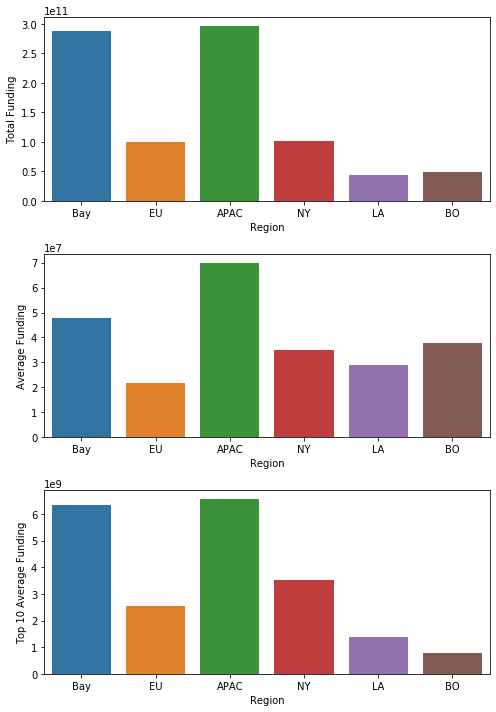

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7,10))

funding = funding.sort_values('Total Funding', ascending=False).sort_index()
sns.barplot(x=funding['Region'], y=funding['Total Funding'], ax=axes[0])
funding = funding.sort_values('Average Funding', ascending=False).sort_index()
sns.barplot(x=funding['Region'], y=funding['Average Funding'], ax=axes[1])
funding = funding.sort_values('Top 10 Average Funding', ascending=False).sort_index()
sns.barplot(x=funding['Region'], y=funding['Top 10 Average Funding'], ax=axes[2])

fig.tight_layout()

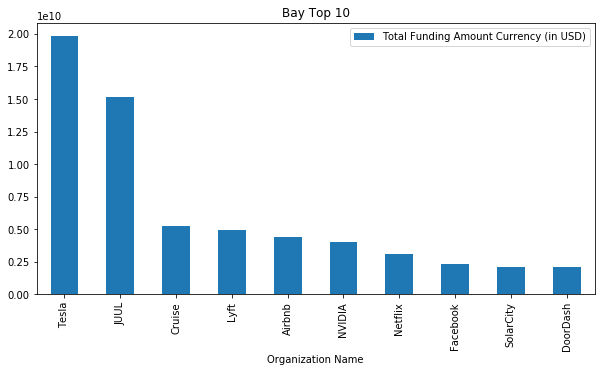

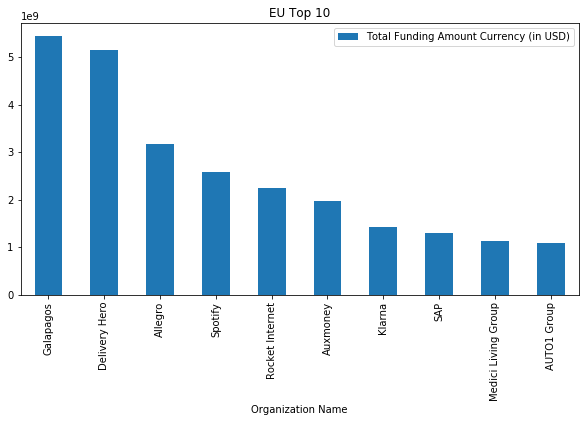

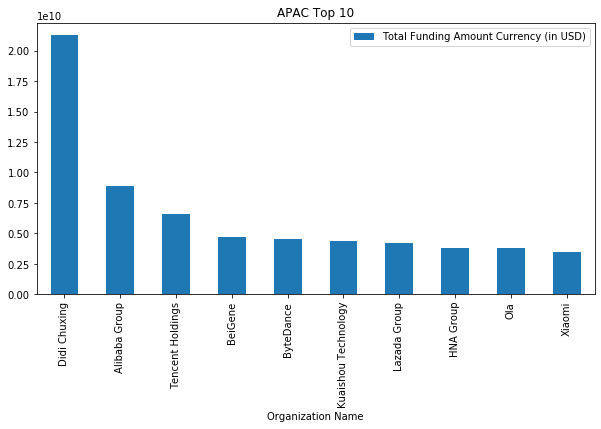

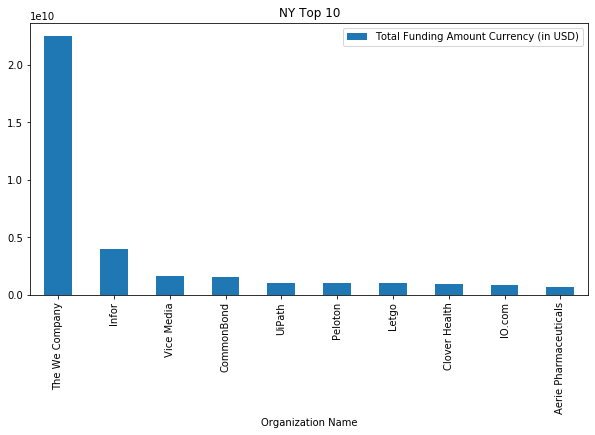

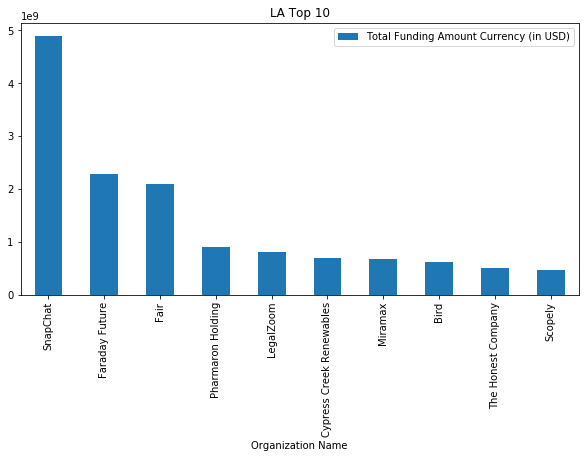

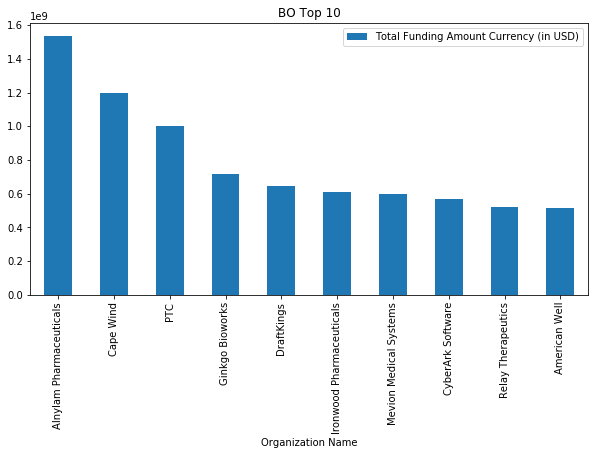

In [22]:
Bay_10 = data_Bay.sort_values('Total Funding Amount Currency (in USD)', ascending=False).head(10)
rg = Bay_10.plot.bar(x='Organization Name', y='Total Funding Amount Currency (in USD)', \
                     rot=90, figsize=(10,5),title = 'Bay Top 10')

EU_10 = data_EU.sort_values('Total Funding Amount Currency (in USD)', ascending=False).head(10)
rg = EU_10.plot.bar(x='Organization Name', y='Total Funding Amount Currency (in USD)', \
                    rot=90, figsize=(10,5), title = 'EU Top 10')

APAC_10 = data_APAC.sort_values('Total Funding Amount Currency (in USD)', ascending=False).head(10)
rg = APAC_10.plot.bar(x='Organization Name', y='Total Funding Amount Currency (in USD)', \
                      rot=90, figsize=(10,5),title = 'APAC Top 10')

NY_10 = data_NY.sort_values('Total Funding Amount Currency (in USD)', ascending=False).head(10)
rg = NY_10.plot.bar(x='Organization Name', y='Total Funding Amount Currency (in USD)', \
                    rot=90, figsize=(10,5),title = 'NY Top 10')

LA_10 = data_LA.sort_values('Total Funding Amount Currency (in USD)', ascending=False).head(10)
rg = LA_10.plot.bar(x='Organization Name', y='Total Funding Amount Currency (in USD)', \
                    rot=90, figsize=(10,5),title = 'LA Top 10')

BO_10 = data_BO.sort_values('Total Funding Amount Currency (in USD)', ascending=False).head(10)
rg = BO_10.plot.bar(x='Organization Name', y='Total Funding Amount Currency (in USD)', \
                    rot=90, figsize=(10,5),title = 'BO Top 10')

In [23]:
cats = ['Finance','E-Commerce','Health Care','Internet','Biotechnology','Artificial Intelligence'
              ,'Information Technology','Education','Advertising','Data','Food','Real Estate','Security',
              'Entertainment','Gaming','Robotics','Fashion','Sports','Tourism','Insurance']

df_cat = new_df[new_df['Categories'] == 'Software']
for i in cats:
    df = new_df[new_df['Categories'] == i]
    df_cat = df_cat.append(df, ignore_index = True)

In [24]:
regions = ['San Francisco Bay Area, West Coast, Western US', 'Asia-Pacific (APAC)', 
    'Greater New York Area, East Coast, Northeastern US', 'Greater Los Angeles Area, West Coast, Western US',
           'Greater Boston Area, East Coast, New England']

df_cat_reg = df_cat[df_cat['Headquarters Regions'] == 'European Union (EU)']
for i in regions:
    df = df_cat[df_cat['Headquarters Regions'] == i]
    df_cat_reg = df_cat_reg.append(df, ignore_index = True)

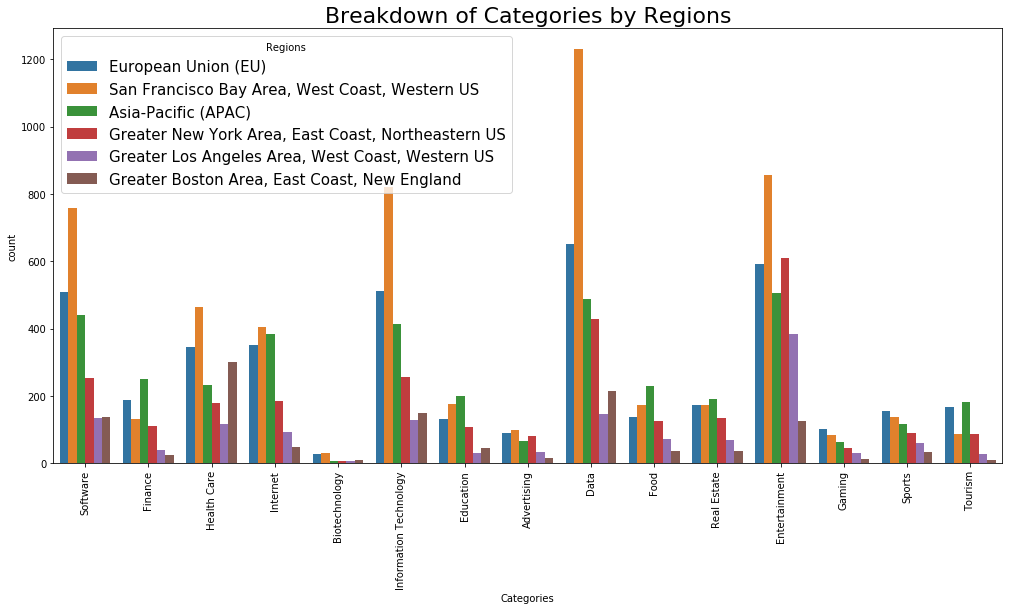

In [25]:
plt.figure(figsize=(17,8))
ax = sns.countplot(x='Categories', hue='Headquarters Regions', data=df_cat_reg)
ax.axes.set_title("Breakdown of Categories by Regions", fontsize=22)
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=10)
plt.legend(fontsize=15, title="Regions");

In [26]:
#creating subdatasets for the top 6 regions
data_EU_cat = df_cat[df_cat['Headquarters Regions'] == 'European Union (EU)']
data_Bay_cat = df_cat[df_cat['Headquarters Regions'] == 'San Francisco Bay Area, West Coast, Western US']
data_APAC_cat = df_cat[df_cat['Headquarters Regions'] == 'Asia-Pacific (APAC)']
data_NY_cat = df_cat[df_cat['Headquarters Regions'] == 'Greater New York Area, East Coast, Northeastern US']
data_LA_cat = df_cat[df_cat['Headquarters Regions'] == 'Greater Los Angeles Area, West Coast, Western US']
data_BO_cat = df_cat[df_cat['Headquarters Regions'] == 'Greater Boston Area, East Coast, New England']

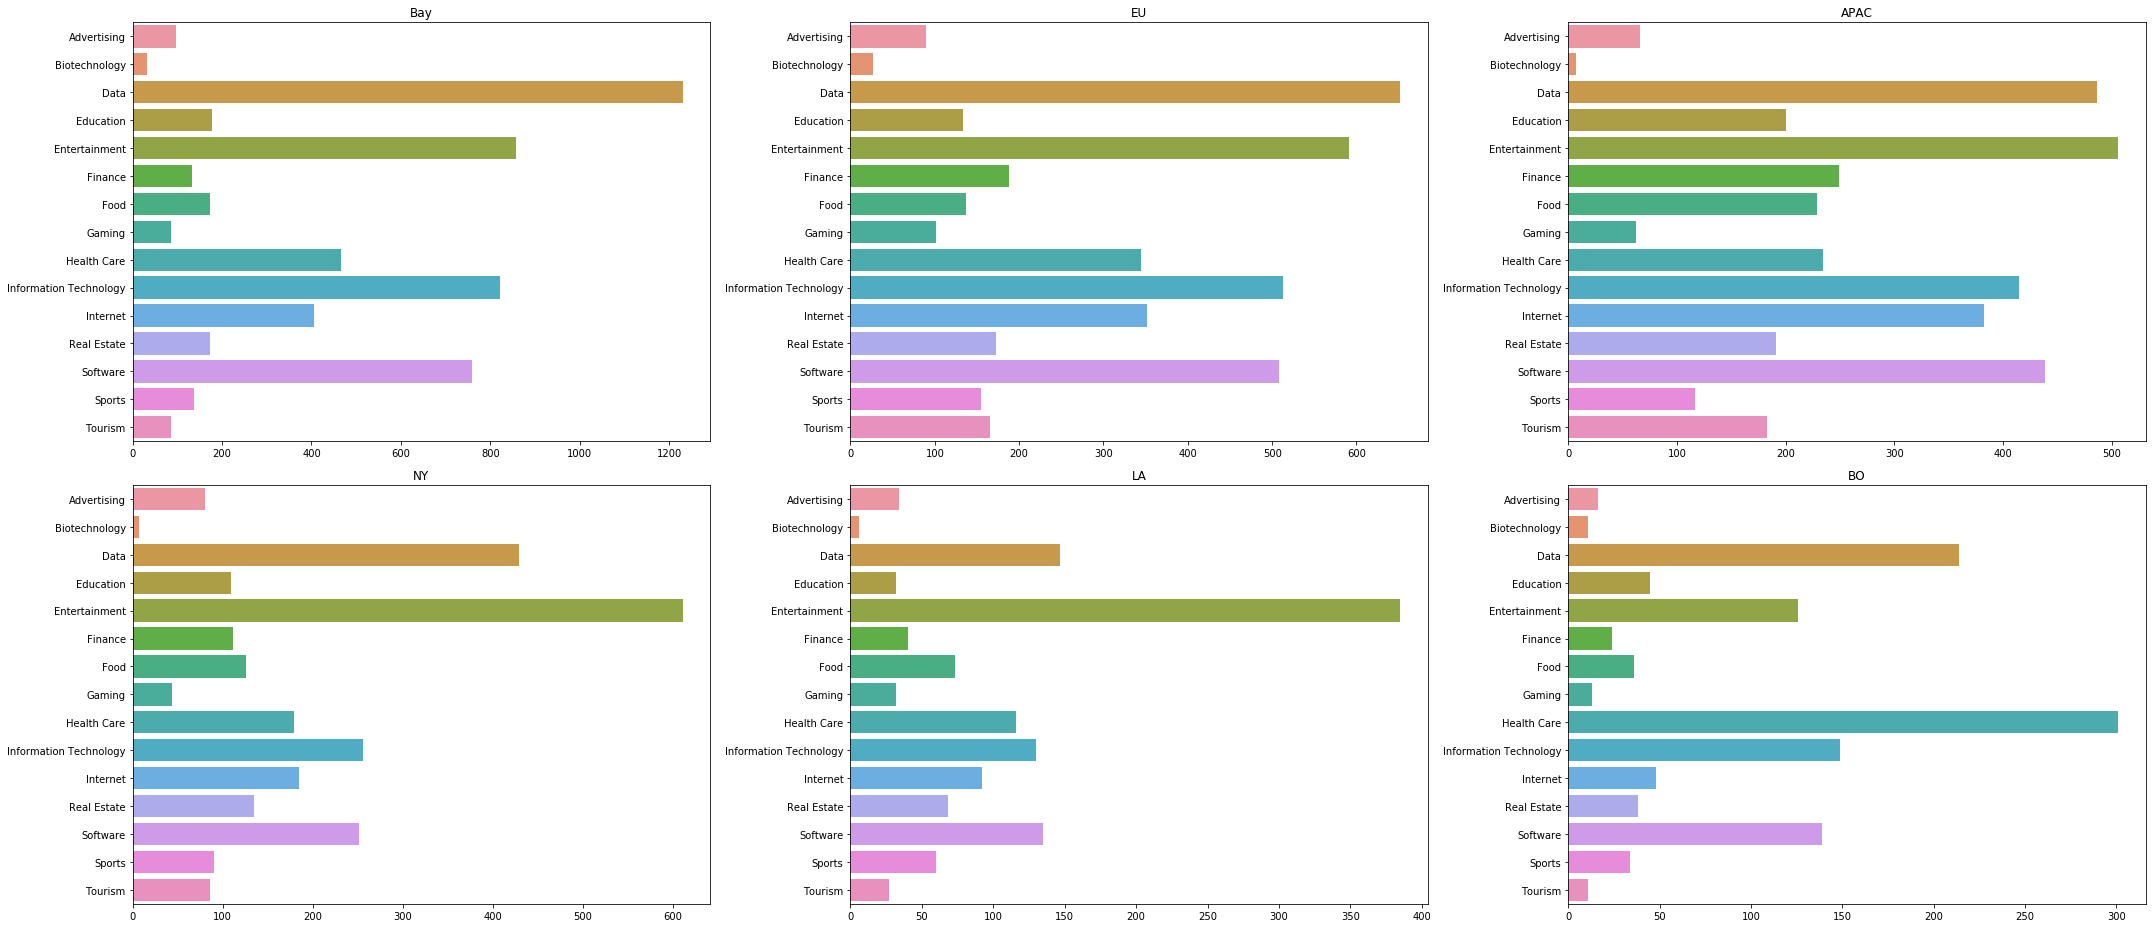

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(30,13))

categories_counts= data_Bay_cat['Categories'].value_counts().sort_index()
sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[0,0])
axes[0,0].set_title('Bay')

categories_counts= data_EU_cat['Categories'].value_counts().sort_index()
sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[0,1])
axes[0,1].set_title('EU')

categories_counts= data_APAC_cat['Categories'].value_counts().sort_index()
sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[0,2])
axes[0,2].set_title('APAC')

categories_counts= data_NY_cat['Categories'].value_counts().sort_index()
sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[1,0])
axes[1,0].set_title('NY')

categories_counts= data_LA_cat['Categories'].value_counts().sort_index()
sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[1,1])
axes[1,1].set_title('LA')

categories_counts= data_BO_cat['Categories'].value_counts().sort_index()
sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[1,2])
axes[1,2].set_title('BO')

fig.tight_layout()

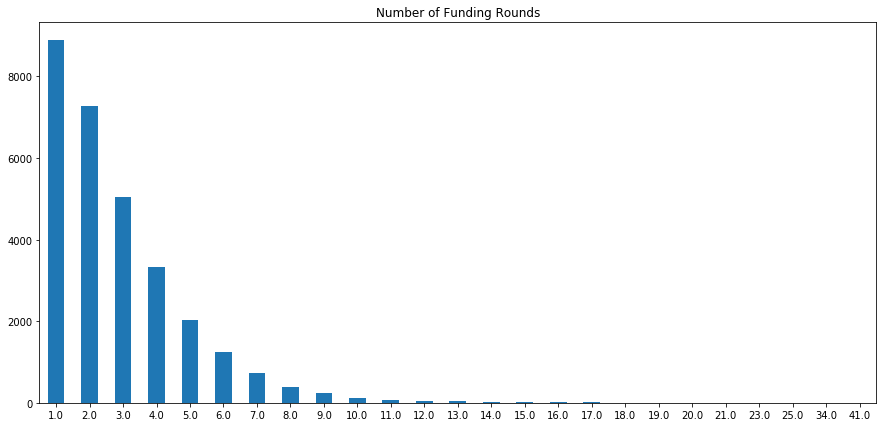

In [28]:
categories_counts= new_df['Number of Funding Rounds'].value_counts().sort_index()
plt.figure(figsize=(15,7))
plt.title('Number of Funding Rounds')
categories_counts.plot.bar(x='Number of Funding Rounds', rot=0)

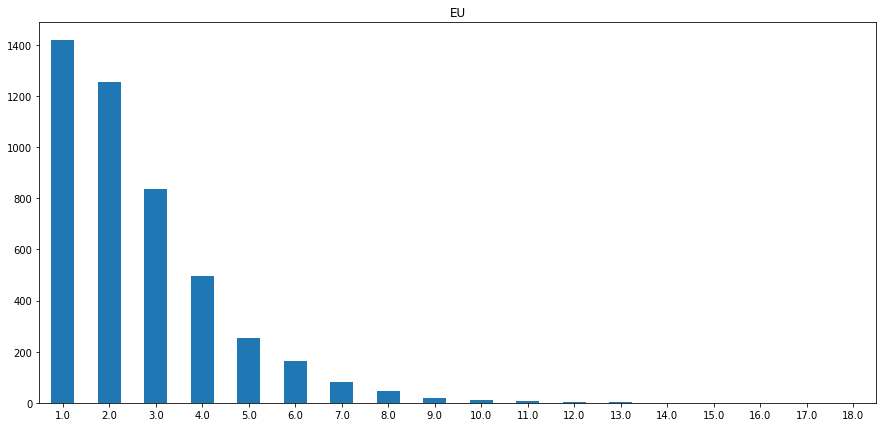

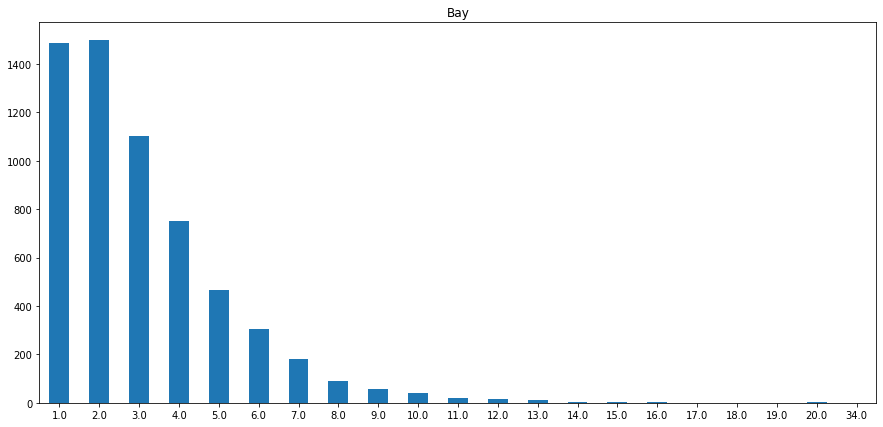

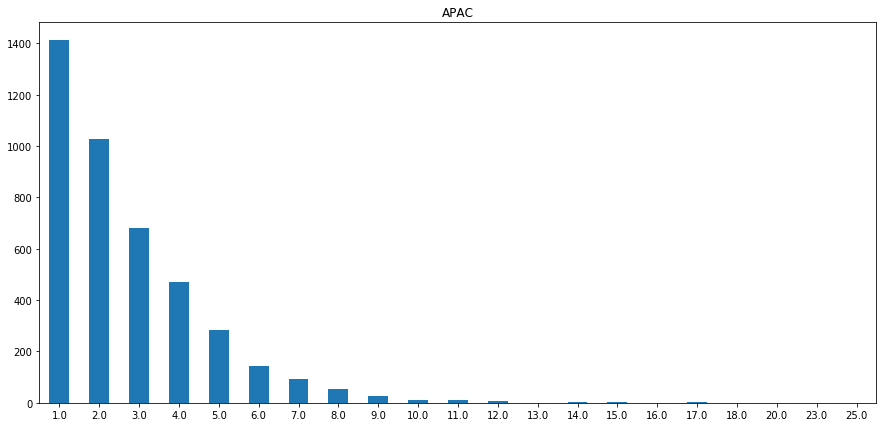

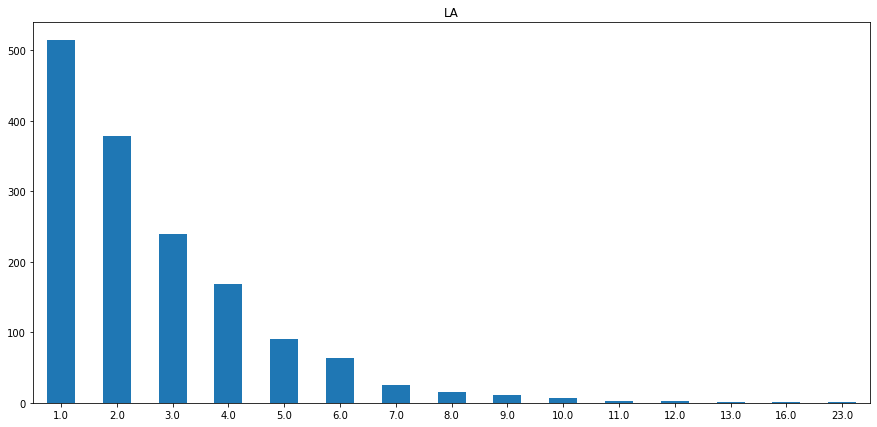

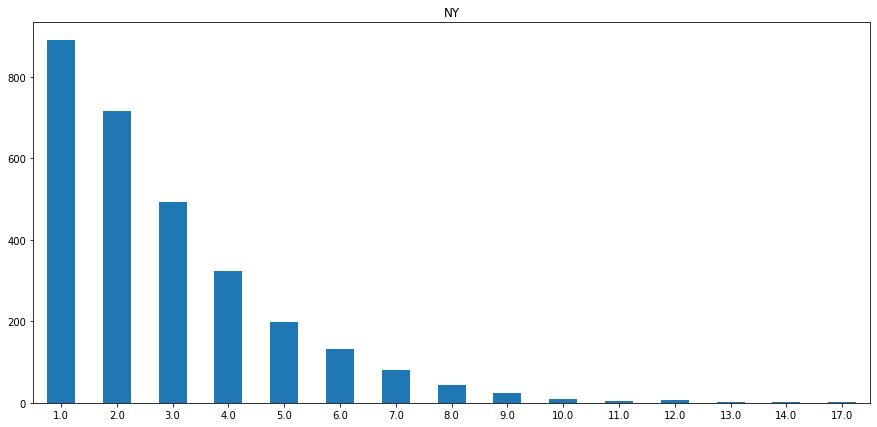

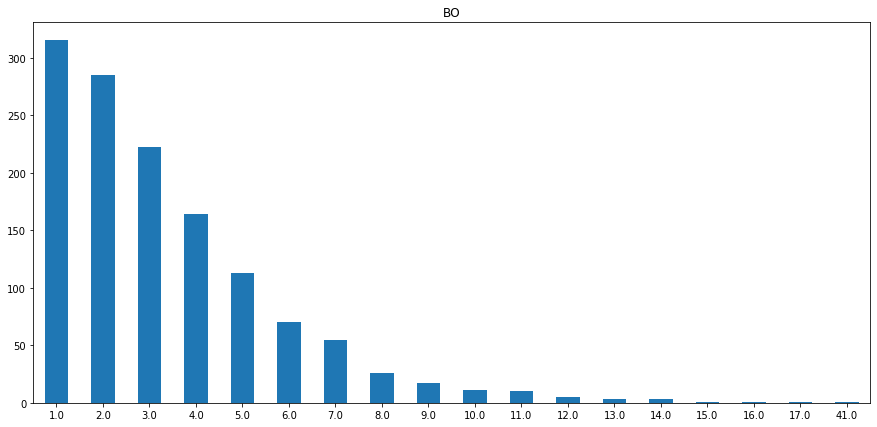

In [29]:
categories_counts= data_EU['Number of Funding Rounds'].value_counts().sort_index()
plt.figure(figsize=(15,7))
categories_counts.plot.bar(x='Number of Funding Rounds', rot=0,title = 'EU')

categories_counts= data_Bay['Number of Funding Rounds'].value_counts().sort_index()
plt.figure(figsize=(15,7))
categories_counts.plot.bar(x='Number of Funding Rounds', rot=0,title = 'Bay')

categories_counts= data_APAC['Number of Funding Rounds'].value_counts().sort_index()
plt.figure(figsize=(15,7))
categories_counts.plot.bar(x='Number of Funding Rounds', rot=0,title = 'APAC')

categories_counts= data_LA['Number of Funding Rounds'].value_counts().sort_index()
plt.figure(figsize=(15,7))
categories_counts.plot.bar(x='Number of Funding Rounds', rot=0,title = 'LA')

categories_counts= data_NY['Number of Funding Rounds'].value_counts().sort_index()
plt.figure(figsize=(15,7))
categories_counts.plot.bar(x='Number of Funding Rounds', rot=0,title = 'NY')

categories_counts= data_BO['Number of Funding Rounds'].value_counts().sort_index()
plt.figure(figsize=(15,7))
categories_counts.plot.bar(x='Number of Funding Rounds', rot=0,title = 'BO')

11-50      11437
1-10        8218
51-100      2925
101-250     2270
251-500      937
Name: Number of Employees, dtype: int64


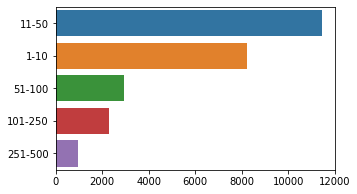

In [30]:
categories_counts= new_df['Number of Employees'].value_counts().nlargest(5)
plt.figure(figsize=(5,3))
sns.barplot(y=categories_counts.index, x=categories_counts.values)
print(categories_counts)

Text(0.5, 1.0, 'BO')

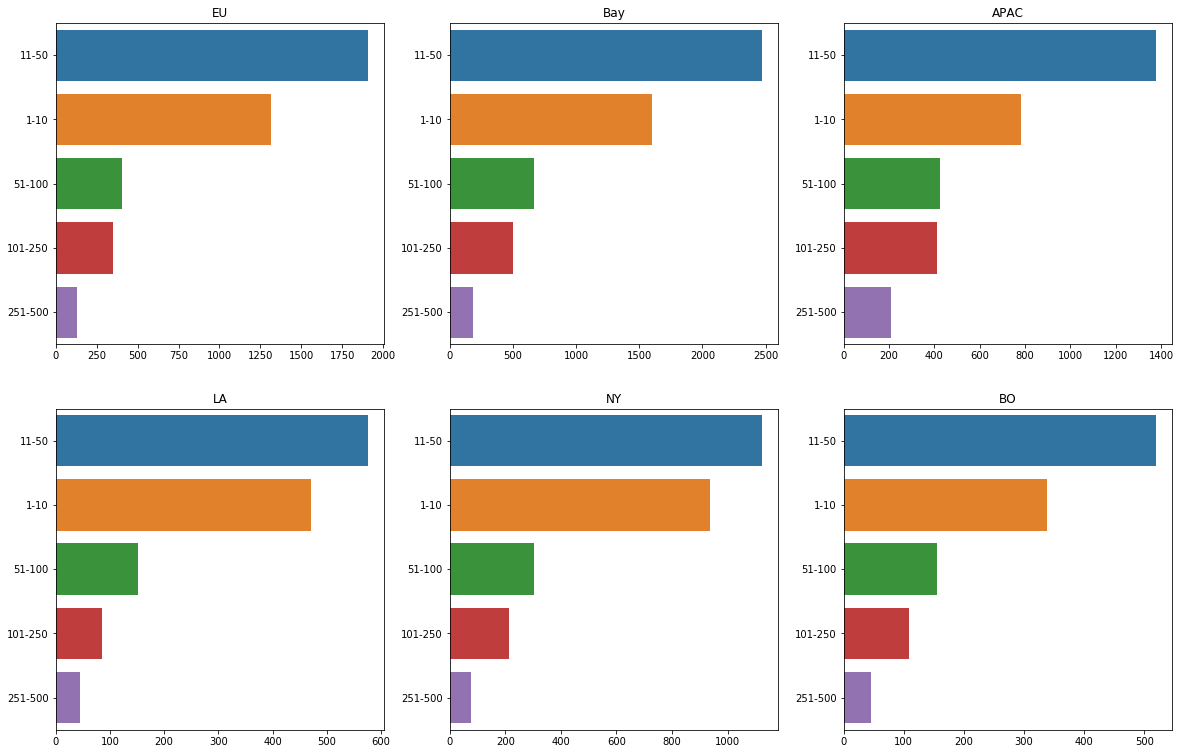

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,13))

categories_counts= data_EU['Number of Employees'].value_counts().nlargest(5)
sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[0,0])
axes[0,0].set_title('EU')

categories_counts= data_Bay['Number of Employees'].value_counts().nlargest(5)
sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[0,1])
axes[0,1].set_title('Bay')

categories_counts= data_APAC['Number of Employees'].value_counts().nlargest(5)
sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[0,2])
axes[0,2].set_title('APAC')

categories_counts= data_LA['Number of Employees'].value_counts().nlargest(5)
sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[1,0])
axes[1,0].set_title('LA')

categories_counts= data_NY['Number of Employees'].value_counts().nlargest(5)
sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[1,1])
axes[1,1].set_title('NY')

categories_counts= data_BO['Number of Employees'].value_counts().nlargest(5)
sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[1,2])
axes[1,2].set_title('BO')

In [32]:
# categories_counts= new_df['Funding Status'].value_counts().nlargest(30).sort_index()
# plt.figure(figsize=(5,7))
# sns.barplot(y=categories_counts.index, x=categories_counts.values)
# print(categories_counts)

In [33]:
# fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,13))

# categories_counts= data_EU['Funding Status'].value_counts().nlargest(30).sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[0,0])
# axes[0,0].set_title('EU')

# categories_counts= data_Bay['Funding Status'].value_counts().nlargest(30).sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[0,1])
# axes[0,1].set_title('Bay')

# categories_counts= data_APAC['Funding Status'].value_counts().nlargest(30).sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[0,2])
# axes[0,2].set_title('APAC')

# categories_counts= data_LA['Funding Status'].value_counts().nlargest(30).sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[1,0])
# axes[1,0].set_title('LA')

# categories_counts= data_NY['Funding Status'].value_counts().nlargest(30).sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[1,1])
# axes[1,1].set_title('NY')

# categories_counts= data_BO['Funding Status'].value_counts().nlargest(30).sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[1,2])
# axes[1,2].set_title('BO')

# fig.tight_layout()

In [34]:
# categories_counts= new_df['Estimated Revenue Range'].value_counts().nlargest(30)
# plt.figure(figsize=(5,7))
# sns.barplot(y=categories_counts.index, x=categories_counts.values)
# print(categories_counts)

In [35]:
# fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,13))

# categories_counts= data_EU['Estimated Revenue Range'].value_counts().nlargest(30).sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[0,0], color="red", saturation=.8)
# axes[0,0].set_title('EU')

# categories_counts= data_Bay['Estimated Revenue Range'].value_counts().nlargest(30).sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[0,1], color="red", saturation=.8)
# axes[0,1].set_title('Bay')

# categories_counts= data_APAC['Estimated Revenue Range'].value_counts().nlargest(30).sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[0,2], color="red", saturation=.8)
# axes[0,2].set_title('APAC')

# categories_counts= data_LA['Estimated Revenue Range'].value_counts().nlargest(30).sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[1,0], color="red", saturation=.8)
# axes[1,0].set_title('LA')

# categories_counts= data_NY['Estimated Revenue Range'].value_counts().nlargest(30).sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[1,1], color="red", saturation=.8)
# axes[1,1].set_title('NY')

# categories_counts= data_BO['Estimated Revenue Range'].value_counts().nlargest(30).sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[1,2], color="red", saturation=.8)
# axes[1,2].set_title('BO')

# fig.tight_layout()

/home/bossou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/bossou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/home/bossou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars
/home/bossou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in double_scalars
/home/bossou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in double_scalars
/home/bossou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in double_scalars


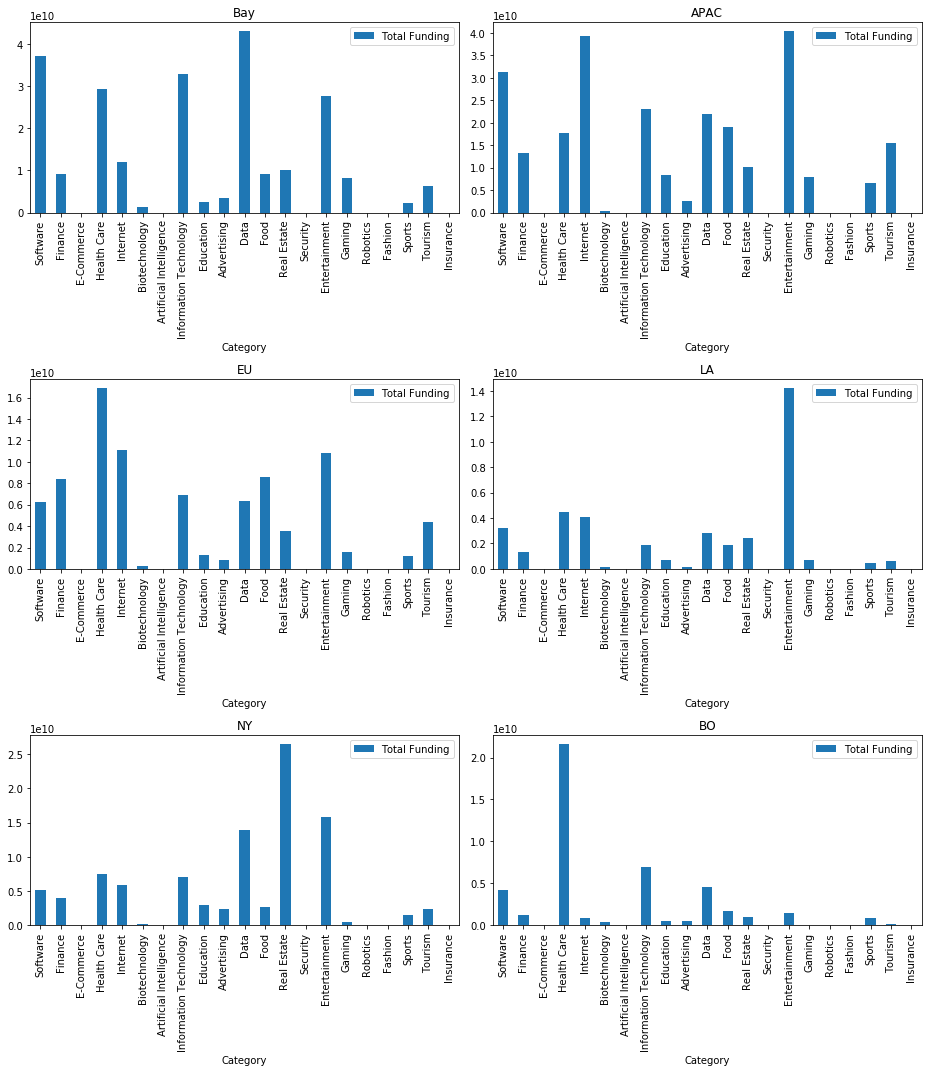

In [36]:
col_names =  ['Region', 'Category' , 'Total Funding', 'Number of Companies', 'Average Funding']
categories = ['Software','Finance','E-Commerce','Health Care','Internet','Biotechnology','Artificial Intelligence'
              ,'Information Technology','Education','Advertising','Data','Food','Real Estate','Security',
              'Entertainment','Gaming','Robotics','Fashion','Sports','Tourism','Insurance']
funding  = pd.DataFrame(columns = col_names)
count = 0
for i in categories:
    funding.loc[count] = ['Bay', i, data_Bay[data_Bay['Categories']==i]['Total Funding Amount Currency (in USD)'].sum(),
                          len(data_Bay[data_Bay['Categories']==i]), 
                          data_Bay[data_Bay['Categories']==i]['Total Funding Amount Currency (in USD)'].sum()/
                          len(data_Bay[data_Bay['Categories']==i])]
    count = count + 1

totalfunding_Bay = funding.sort_values('Total Funding', ascending=False).sort_index()
avgfunding_Bay = funding.sort_values('Average Funding', ascending=False).sort_index()

count = 0
for i in categories:
    funding.loc[count] = ['APAC', i, data_APAC[data_APAC['Categories']==i]['Total Funding Amount Currency (in USD)'].sum(),
                          len(data_APAC[data_APAC['Categories']==i]), 
                          data_APAC[data_APAC['Categories']==i]['Total Funding Amount Currency (in USD)'].sum()/
                          len(data_APAC[data_APAC['Categories']==i])]
    count = count + 1

totalfunding_APAC = funding.sort_values('Total Funding', ascending=False).sort_index()
avgfunding_APAC = funding.sort_values('Average Funding', ascending=False).sort_index()

count = 0
for i in categories:
    funding.loc[count] = ['EU', i, data_EU[data_EU['Categories']==i]['Total Funding Amount Currency (in USD)'].sum(),
                          len(data_EU[data_EU['Categories']==i]), 
                          data_EU[data_EU['Categories']==i]['Total Funding Amount Currency (in USD)'].sum()/
                          len(data_EU[data_EU['Categories']==i])]
    count = count + 1

totalfunding_EU = funding.sort_values('Total Funding', ascending=False).sort_index()
avgfunding_EU = funding.sort_values('Average Funding', ascending=False).sort_index()

count = 0
for i in categories:
    funding.loc[count] = ['LA', i, data_LA[data_LA['Categories']==i]['Total Funding Amount Currency (in USD)'].sum(),
                          len(data_LA[data_LA['Categories']==i]), 
                          data_LA[data_LA['Categories']==i]['Total Funding Amount Currency (in USD)'].sum()/
                          len(data_LA[data_LA['Categories']==i])]
    count = count + 1

totalfunding_LA = funding.sort_values('Total Funding', ascending=False).sort_index()
avgfunding_LA = funding.sort_values('Average Funding', ascending=False).sort_index()

count = 0
for i in categories:
    funding.loc[count] = ['NY', i, data_NY[data_NY['Categories']==i]['Total Funding Amount Currency (in USD)'].sum(),
                          len(data_NY[data_NY['Categories']==i]), 
                          data_NY[data_NY['Categories']==i]['Total Funding Amount Currency (in USD)'].sum()/
                          len(data_NY[data_NY['Categories']==i])]
    count = count + 1

totalfunding_NY = funding.sort_values('Total Funding', ascending=False).sort_index()
avgfunding_NY = funding.sort_values('Average Funding', ascending=False).sort_index()

count = 0
for i in categories:
    funding.loc[count] = ['BO', i, data_BO[data_BO['Categories']==i]['Total Funding Amount Currency (in USD)'].sum(),
                          len(data_BO[data_BO['Categories']==i]), 
                          data_BO[data_BO['Categories']==i]['Total Funding Amount Currency (in USD)'].sum()/
                          len(data_BO[data_BO['Categories']==i])]
    count = count + 1

totalfunding_BO = funding.sort_values('Total Funding', ascending=False).sort_index()
avgfunding_BO = funding.sort_values('Average Funding', ascending=False).sort_index()


fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(13,15))

rg=totalfunding_Bay.plot.bar(x='Category', y='Total Funding', rot=0,title = 'Bay', ax=axes[0,0])
plt.setp(rg.get_xticklabels(), rotation=90)
rg=totalfunding_APAC.plot.bar(x='Category', y='Total Funding', rot=0,title = 'APAC', ax=axes[0,1])
plt.setp(rg.get_xticklabels(), rotation=90)
rg=totalfunding_EU.plot.bar(x='Category', y='Total Funding', rot=0,title = 'EU', ax=axes[1,0])
plt.setp(rg.get_xticklabels(), rotation=90)
rg=totalfunding_LA.plot.bar(x='Category', y='Total Funding', rot=0,title = 'LA', ax=axes[1,1])
plt.setp(rg.get_xticklabels(), rotation=90)
rg=totalfunding_NY.plot.bar(x='Category', y='Total Funding', rot=0,title = 'NY', ax=axes[2,0])
plt.setp(rg.get_xticklabels(), rotation=90)
rg=totalfunding_BO.plot.bar(x='Category', y='Total Funding', rot=0,title = 'BO', ax=axes[2,1])
plt.setp(rg.get_xticklabels(), rotation=90)


fig.tight_layout()

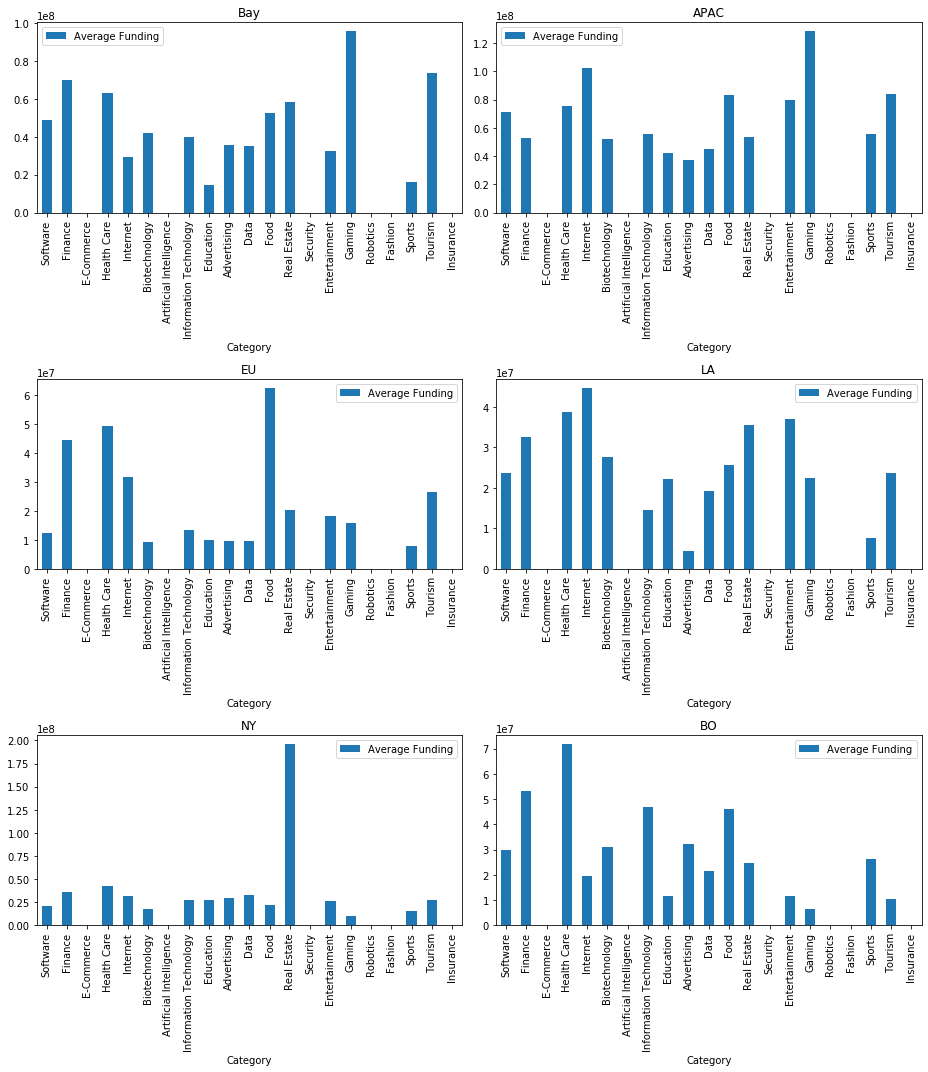

In [37]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(13,15))

rg=avgfunding_Bay.plot.bar(x='Category', y='Average Funding', rot=0, title = 'Bay', ax=axes[0,0])
plt.setp(rg.get_xticklabels(), rotation=90)
rg=avgfunding_APAC.plot.bar(x='Category', y='Average Funding', rot=0, title = 'APAC', ax=axes[0,1])
plt.setp(rg.get_xticklabels(), rotation=90)
rg=avgfunding_EU.plot.bar(x='Category', y='Average Funding', rot=0, title = 'EU', ax=axes[1,0])
plt.setp(rg.get_xticklabels(), rotation=90)
rg=avgfunding_LA.plot.bar(x='Category', y='Average Funding', rot=0, title = 'LA', ax=axes[1,1])
plt.setp(rg.get_xticklabels(), rotation=90)
rg=avgfunding_NY.plot.bar(x='Category', y='Average Funding', rot=0, title = 'NY', ax=axes[2,0])
plt.setp(rg.get_xticklabels(), rotation=90)
rg=avgfunding_BO.plot.bar(x='Category', y='Average Funding', rot=0, title = 'BO', ax=axes[2,1])
plt.setp(rg.get_xticklabels(), rotation=90)


fig.tight_layout()

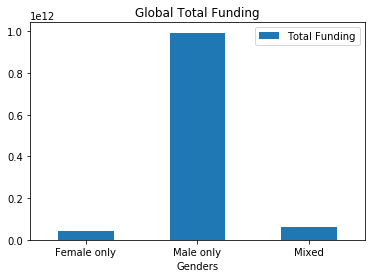

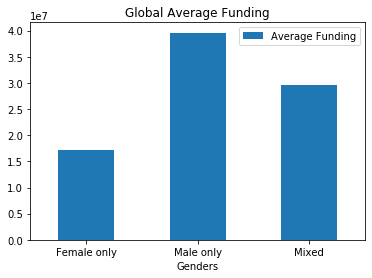

In [38]:
col_names =  ['Genders', 'Total Funding', 'Average Funding']
funding  = pd.DataFrame(columns = col_names)
funding.loc[0] = ['Female only', new_df[new_df['Group Gender']=='Female only']['Total Funding Amount Currency (in USD)'].sum(),
                  new_df[new_df['Group Gender']=='Female only']['Total Funding Amount Currency (in USD)'].sum()/len(new_df[new_df['Group Gender']=='Female only'])]
funding.loc[1] = ['Male only', new_df[new_df['Group Gender']=='Male only']['Total Funding Amount Currency (in USD)'].sum(),
                  new_df[new_df['Group Gender']=='Male only']['Total Funding Amount Currency (in USD)'].sum()/len(new_df[new_df['Group Gender']=='Male only'])]
funding.loc[2] = ['Mixed', new_df[new_df['Group Gender']=='Mixed']['Total Funding Amount Currency (in USD)'].sum(),
                  new_df[new_df['Group Gender']=='Mixed']['Total Funding Amount Currency (in USD)'].sum()/len(new_df[new_df['Group Gender']=='Mixed'])]

funding.plot.bar(x='Genders', y='Total Funding', rot=0, title = 'Global Total Funding')
funding.plot.bar(x='Genders', y='Average Funding', rot=0, title = 'Global Average Funding')

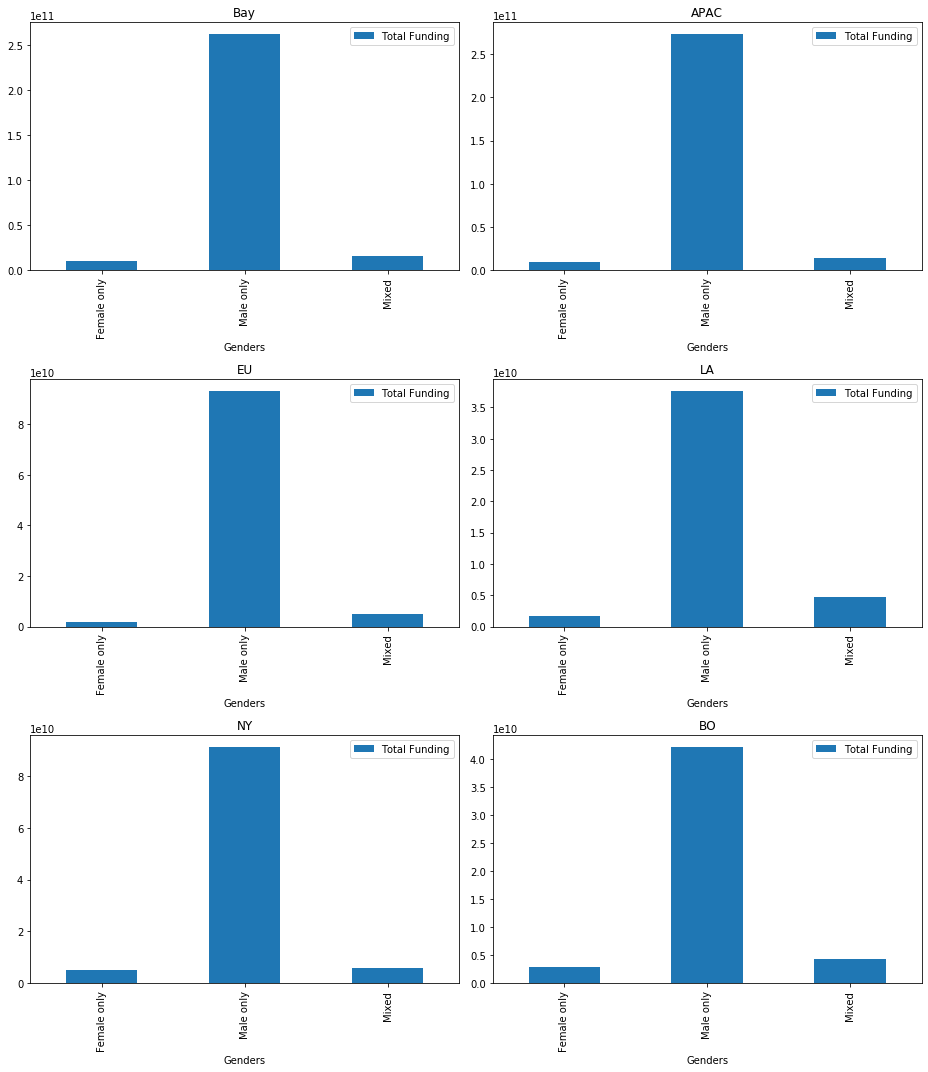

In [39]:
col_names =  ['Genders', 'Total Funding', 'Average Funding']
genders = ['Female only', 'Male only', 'Mixed']
funding  = pd.DataFrame(columns = col_names)
count = 0
for i in genders:
    funding.loc[count] = [i, data_Bay[data_Bay['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum(),
                          data_Bay[data_Bay['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum()/
                          len(data_Bay[data_Bay['Group Gender']==i])]
    count = count + 1

totalfunding_Bay = funding.sort_values('Total Funding', ascending=False).sort_index()
avgfunding_Bay = funding.sort_values('Average Funding', ascending=False).sort_index()

count = 0
for i in genders:
    funding.loc[count] = [i, data_APAC[data_APAC['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum(),
                          data_APAC[data_APAC['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum()/
                          len(data_APAC[data_APAC['Group Gender']==i])]
    count = count + 1
    
totalfunding_APAC = funding.sort_values('Total Funding', ascending=False).sort_index()
avgfunding_APAC = funding.sort_values('Average Funding', ascending=False).sort_index()

count = 0

for i in genders:
    funding.loc[count] = [i, data_EU[data_EU['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum(),
                          data_EU[data_EU['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum()/
                          len(data_EU[data_EU['Group Gender']==i])]
    count = count + 1

totalfunding_EU = funding.sort_values('Total Funding', ascending=False).sort_index()
avgfunding_EU = funding.sort_values('Average Funding', ascending=False).sort_index()

count = 0
for i in genders:
    funding.loc[count] = [i, data_LA[data_LA['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum(),
                          data_LA[data_LA['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum()/
                          len(data_LA[data_LA['Group Gender']==i])]
    count = count + 1

totalfunding_LA = funding.sort_values('Total Funding', ascending=False).sort_index()
avgfunding_LA = funding.sort_values('Average Funding', ascending=False).sort_index()

count = 0
for i in genders:
    funding.loc[count] = [i, data_NY[data_NY['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum(),
                          data_NY[data_NY['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum()/
                          len(data_NY[data_NY['Group Gender']==i])]
    count = count + 1

totalfunding_NY = funding.sort_values('Total Funding', ascending=False).sort_index()
avgfunding_NY = funding.sort_values('Average Funding', ascending=False).sort_index()

count = 0
for i in genders:
    funding.loc[count] = [i, data_BO[data_BO['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum(),
                          data_BO[data_BO['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum()/
                          len(data_BO[data_BO['Group Gender']==i])]
    count = count + 1

totalfunding_BO = funding.sort_values('Total Funding', ascending=False).sort_index()
avgfunding_BO = funding.sort_values('Average Funding', ascending=False).sort_index()


fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(13,15))

rg=totalfunding_Bay.plot.bar(x='Genders', y='Total Funding', rot=0,title = 'Bay', ax=axes[0,0])
plt.setp(rg.get_xticklabels(), rotation=90)
rg=totalfunding_APAC.plot.bar(x='Genders', y='Total Funding', rot=0,title = 'APAC', ax=axes[0,1])
plt.setp(rg.get_xticklabels(), rotation=90)
rg=totalfunding_EU.plot.bar(x='Genders', y='Total Funding', rot=0,title = 'EU', ax=axes[1,0])
plt.setp(rg.get_xticklabels(), rotation=90)
rg=totalfunding_LA.plot.bar(x='Genders', y='Total Funding', rot=0,title = 'LA', ax=axes[1,1])
plt.setp(rg.get_xticklabels(), rotation=90)
rg=totalfunding_NY.plot.bar(x='Genders', y='Total Funding', rot=0,title = 'NY', ax=axes[2,0])
plt.setp(rg.get_xticklabels(), rotation=90)
rg=totalfunding_BO.plot.bar(x='Genders', y='Total Funding', rot=0,title = 'BO', ax=axes[2,1])
plt.setp(rg.get_xticklabels(), rotation=90)


fig.tight_layout()

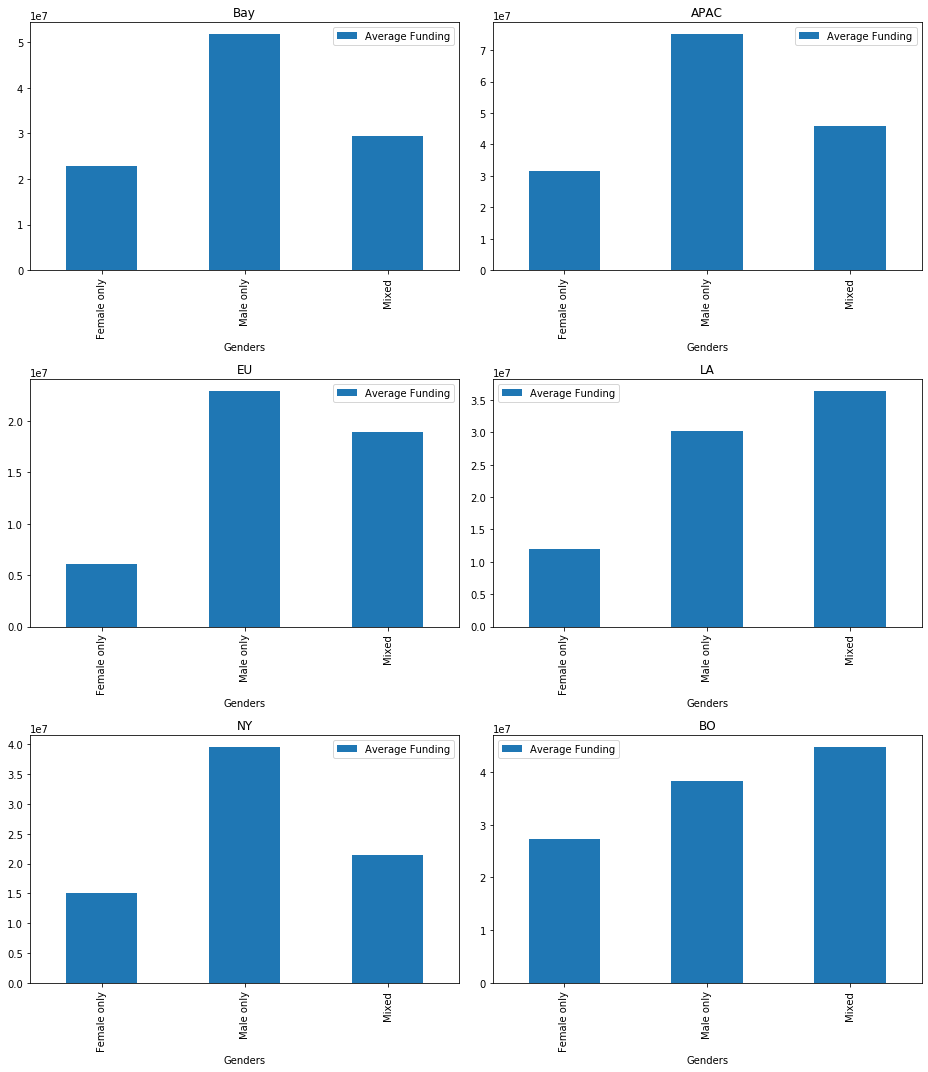

In [40]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(13,15))

rg=avgfunding_Bay.plot.bar(x='Genders', y='Average Funding', rot=0, title = 'Bay', ax=axes[0,0])
plt.setp(rg.get_xticklabels(), rotation=90)
rg=avgfunding_APAC.plot.bar(x='Genders', y='Average Funding', rot=0, title = 'APAC', ax=axes[0,1])
plt.setp(rg.get_xticklabels(), rotation=90)
rg=avgfunding_EU.plot.bar(x='Genders', y='Average Funding', rot=0, title = 'EU', ax=axes[1,0])
plt.setp(rg.get_xticklabels(), rotation=90)
rg=avgfunding_LA.plot.bar(x='Genders', y='Average Funding', rot=0, title = 'LA', ax=axes[1,1])
plt.setp(rg.get_xticklabels(), rotation=90)
rg=avgfunding_NY.plot.bar(x='Genders', y='Average Funding', rot=0, title = 'NY', ax=axes[2,0])
plt.setp(rg.get_xticklabels(), rotation=90)
rg=avgfunding_BO.plot.bar(x='Genders', y='Average Funding', rot=0, title = 'BO', ax=axes[2,1])
plt.setp(rg.get_xticklabels(), rotation=90)


fig.tight_layout()